In [1]:
import numpy as np
import pandas as pd
from scipy.constants import h,k,c,Wien,sigma, Avogadro
from astroquery.vizier import Vizier

%matplotlib inline
import matplotlib.pyplot as plt

# change plotting defaults
plt.rc('axes', labelsize=18)
plt.rc('axes', labelweight='bold')
plt.rc('axes', titlesize=16)
plt.rc('axes', titleweight='bold')
plt.rc('font', family='sans-serif')
plt.rcParams['errorbar.capsize'] = 3
opts = {'mec':'k', 'mew': 0.5, 'lw': 1}
plt.rcParams['figure.figsize'] = (14, 10)

# Photosynthesis - Irradiance (PI) Curve 

Create a PI curve of an oxygenic photosynthetic organism to see how it would fair with your assumption of rate of oxygen production is linearly proportional to the number of photons in PAR. 

First try is using the PI curve equation and data from Dobbs et al. 1999 PHOTOSYNTHESIS-IRRADIANCE PATTERNS IN BENTHIC MICROALGAE: VARIATIONS AS A FUNCTION OF ASSEMBLAGE THICKNESS AND COMMUNITY STRUCTURE https://onlinelibrary.wiley.com/doi/abs/10.1046/j.1529-8817.1999.3510042.x

Platt et al. (1980)
\begin{equation}
    P = P_{s} (1-e^{-\alpha I/P_{s}})e^{-\beta I/P_{s}}
\end{equation}

P = photosynthetic rate, P_s = maximum photosynthesis in the absence of photoinhibition under optimal light, 
alpha = the slope of the line at low light, beta = the photoinhibition constant, and I = irradiance.

TO finish today
* Remove data points, not needed and incorrect (checked)
* Check on why models don't intersect 0. (checked)
* Use the Dobbs et al. 1999 of Cyanobacteria at surface and 4 mm for paper (checked)
* Do two versions of 15 micromol m-2 s-1 for tidal lock and ~7 micromol m-2 s-1 for day-night cycle. (checked)
* Correct the timescale based on your ratio (checked)
* Put all this all their own chapter as Ch 6 between ch5 and the orignal Ch 6. 3 figures of PI Curve, one of the overall scale, one of just at Earth, one at the two TRAPPIST-1e. (checked)

In [2]:
#P = photosynthetic rate, P_s = maximum photosynthesis inthe absence of photoinhibition under optimal light, 
#alpha = the slopeof the line at low light, beta = the photoinhibition constant, and I = irradiance.
def PI_curve_Dobbs(P_s, alpha, beta, I):
    x = (-1*alpha*I)/(P_s)
    y = (-1*beta*I)/(P_s)
    P = P_s*(1-np.exp(x))*(np.exp(y))
    return P

#Units: α and β= mmol O2·L-1·min-1(µmol photon·m-2·s-1)-1, P_s = mmol O2·L-1·min-1, I = µmol photon·m-2·s-1

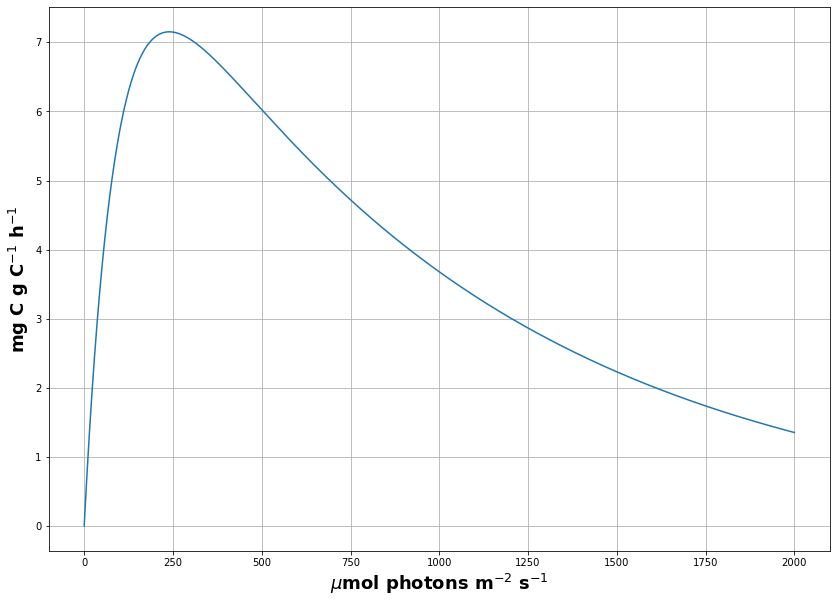

In [3]:
#test range of irradiance in micromol m-2 s-1
I_test = np.arange(0, 2e3, 1e-4)
PI_test = PI_curve_Dobbs(10, 0.1, 0.01, I_test) #P_s = 10, alpha = 0.1, beta = 0.01
plt.plot(I_test, PI_test)
plt.xlabel(r'$\mu$mol photons m$^{-2}$ s$^{-1}$')
plt.ylabel(r'mg C g C$^{-1}$ h$^{-1}$')
plt.grid();

Irradiance needs to be micromol m-2 s-1

Ulothrix (16 Feb. 1997)
* at areal: alpha - 0.00028, P_s - 108.90, Beta - 0.05547
* At surface: alpha - 0.00004, P_s - 10.66, Beta - 0.00445

Cyanobacterial unicells
* At surface:  alpha - 0.00023, P_s - 23.55, Beta - 0.02410
* At 4 mm depth: alpha - 0.00045, P_s - 13.52, Beta - 0.02226

Based on ASTM data on the surface at 1.5 air mass on Earth, the amounts of photons are 1735.20 $\mu$mol m$^{-2}$ s$^{-1}$ in PAR. However, the mean photosythetic flux of 800 $\mu$mol m$^{-2}$ s$^{-1}$ is the main focus. Divide by these two gets 2.169 to include the day-night cycle. For TRAPPIST-1e, do both version of a tidal lock is the 15.775 $\mu$mol m$^{-2}$ s$^{-1}$ and a day night cycle by dividing from 2.169 factor as 7.273 $\mu$mol m$^{-2}$ s$^{-1}$.

In [4]:
1735.1995687724823/800

2.168999460965603

In [5]:
15.775378788664256/2.168999460965603

7.273113282214148

In [6]:
I_test1 = np.arange(0, 3e3, 1e-2)
#Cyanobacterial unicells at surface
#P_s = 23.55, alpha = 0.00023, beta = 0.02410
PI_cyano_uni_surface_model = PI_curve_Dobbs(23.55, 0.00023, 0.02410, I_test1)
#P_s = 13.52, alpha = 0.00045, beta = 0.02226
PI_cyano_uni_4mm_model = PI_curve_Dobbs(13.52, 0.00045, 0.02226, I_test1)

In [7]:
PI_curve_Dobbs(23.55, 0.00023, 0.02410, 0)

0.0

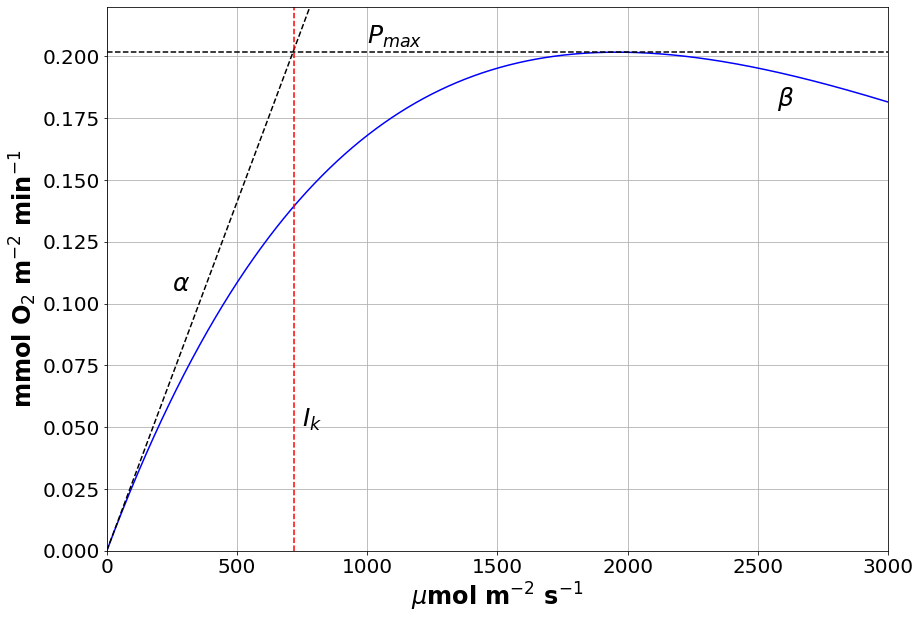

In [8]:
PI_Ulothrix_areal_model = PI_curve_Dobbs(108.90, 0.00028, 0.05547, I_test1)
#I_k = 720
y_U = (0.2032/720)*I_test1
plt.plot(I_test1, PI_Ulothrix_areal_model, color='blue')
plt.plot(I_test1, y_U, color='black', ls='--')
plt.xlim(0, 3000)
plt.ylim(0, 0.22)
plt.axvline(720, c='red', ls='--')
plt.axhline(PI_Ulothrix_areal_model[np.argmax(PI_Ulothrix_areal_model)], ls='--', c='black')
plt.xlabel(r'$\mu$mol m$^{-2}$ s$^{-1}$', fontsize='24')
plt.ylabel(r'mmol O$_{2}$ m$^{-2}$ min$^{-1}$', fontsize='24')
plt.text(1000, 0.205, r'$P_{max}$', fontsize=25)
plt.text(250, 0.105, r'$\alpha$', fontsize=25)
plt.text(750, 0.05, r'$I_{k}$', fontsize=25)
plt.text(2575, 0.180, r'$\beta$', fontsize=25)
plt.xticks(color='black', fontsize = 20)
plt.yticks(color='black', fontsize = 20)
plt.grid()
plt.savefig('Ulothrix.png');

In [9]:
PI_Ulothrix_areal_model[np.argmax(PI_Ulothrix_areal_model)]

0.2017153707863899

NOTE: Photorespiration seems to be absent in the graphs due to the nature of the equations where you should have a negative y-value. But this is fine. Just make sure to mention this and why that occurs in your paper. 

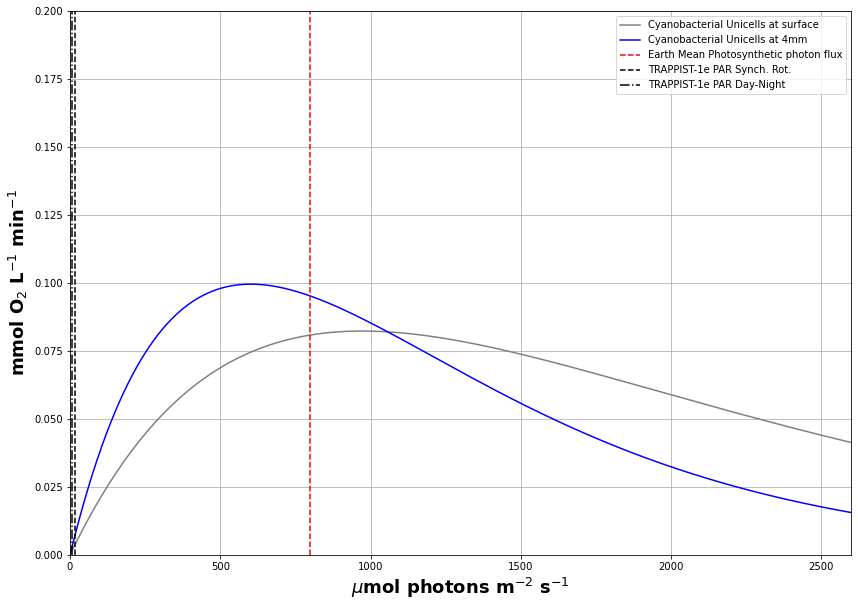

In [10]:
plt.plot(I_test1, PI_cyano_uni_surface_model, color='grey', label='Cyanobacterial Unicells at surface')
plt.plot(I_test1, PI_cyano_uni_4mm_model, color='blue', label='Cyanobacterial Unicells at 4mm')
plt.xlim(0, 2600)
plt.ylim(0,0.20)
plt.axvline(800, c='red', ls='--', label='Earth Mean Photosynthetic photon flux')
plt.axvline(15.775378788664256, c='black', ls='--', label='TRAPPIST-1e PAR Synch. Rot.')
plt.axvline(7.273113282214148, c='black', ls='dashdot', label='TRAPPIST-1e PAR Day-Night')
plt.xlabel(r'$\mu$mol photons m$^{-2}$ s$^{-1}$')
plt.ylabel(r'mmol O$_{2}$ L$^{-1}$ min$^{-1}$')
plt.legend()
plt.grid();

In [11]:
I_cyano_uni_surface_y800 = PI_curve_Dobbs(23.55, 0.00023, 0.02410, 800) 
#P_s =23.55, alpha = 0.00023, beta=0.02410, I = 800
I_cyano_uni_4mm_y800 = PI_curve_Dobbs(13.52, 0.00045, 0.02226, 800) 
#P_s = 13.52, alpha = 0.00045, beta = 0.02226, I = 800

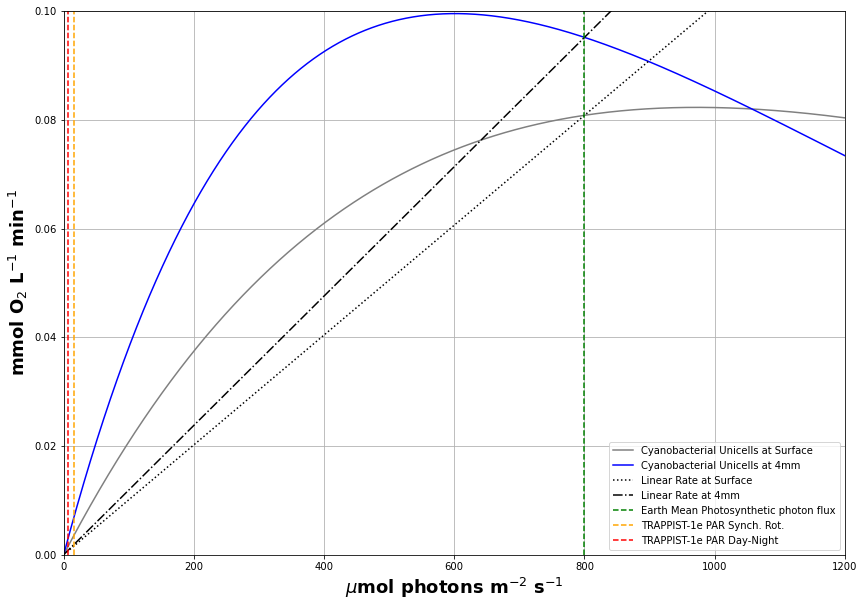

In [12]:
y_S = (I_cyano_uni_surface_y800/800)*I_test1
y_4mm = (I_cyano_uni_4mm_y800/800)*I_test1
plt.plot(I_test1, PI_cyano_uni_surface_model, color='grey', label='Cyanobacterial Unicells at Surface')
plt.plot(I_test1, PI_cyano_uni_4mm_model, color='blue', label='Cyanobacterial Unicells at 4mm')
plt.plot(I_test1, y_S, color='black', ls='dotted', label = 'Linear Rate at Surface')
plt.plot(I_test1, y_4mm, color='black', ls='dashdot', label = 'Linear Rate at 4mm')
plt.xlim(0, 1200)
plt.ylim(0,0.1)
plt.axvline(800, c='green', ls='--', label='Earth Mean Photosynthetic photon flux')
plt.axvline(15.775378788664256, c='orange', ls='--', label='TRAPPIST-1e PAR Synch. Rot.')
plt.axvline(7.273113282214148, c='red', ls='--', label='TRAPPIST-1e PAR Day-Night')
plt.xlabel(r'$\mu$mol photons m$^{-2}$ s$^{-1}$')
plt.ylabel(r'mmol O$_{2}$ L$^{-1}$ min$^{-1}$')
plt.legend()
plt.grid();

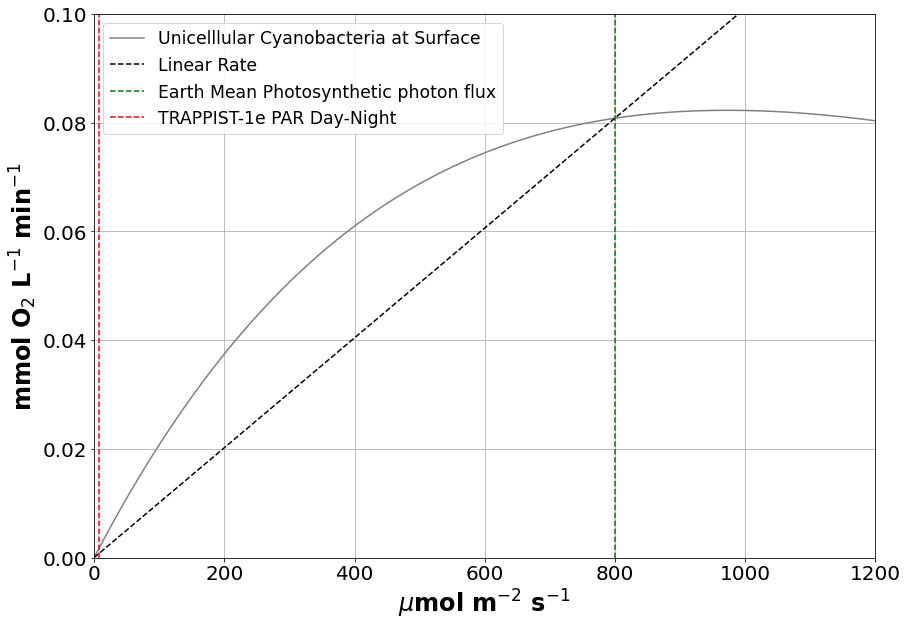

In [13]:
#For Cyanobacteria at surface. Use only the Day-Night line on the graph.
y_S = (I_cyano_uni_surface_y800/800)*I_test1
#y_4mm = (I_cyano_uni_4mm_y800/800)*I_test1
plt.plot(I_test1, PI_cyano_uni_surface_model, color='grey', label='Unicelllular Cyanobacteria at Surface')
#plt.plot(I_test1, PI_cyano_uni_4mm_model, color='blue', label='Cyanobacterial Unicells at 4mm')
plt.plot(I_test1, y_S, color='black', ls='--', label = 'Linear Rate')
#plt.plot(I_test1, y_4mm, color='black', ls='dashdot', label = 'Linear Rate at 4mm')
plt.xlim(0, 1200)
plt.ylim(0,0.1)
plt.axvline(800, c='green', ls='--', label='Earth Mean Photosynthetic photon flux')
plt.axvline(7.273113282214148, c='red', ls='--', label='TRAPPIST-1e PAR Day-Night')
plt.xlabel(r'$\mu$mol m$^{-2}$ s$^{-1}$', fontsize='24')
plt.ylabel(r'mmol O$_{2}$ L$^{-1}$ min$^{-1}$', fontsize='24')
plt.xticks(color='black', fontsize = 20)
plt.yticks(color='black', fontsize = 20)
plt.legend(fontsize='xx-large')
plt.grid()
plt.savefig('PI_Curve_CyanoUni_Surface.png');

You need to make sure to find out how dim Archaen Earth was in the PAR (at each time epoch) compared to today in PAR. Then use it to multiple the 800 PAR average of the Sun today to the average PAR flux of that epoch. This create a new PI Curve comparsion and new photoinhibition factor/ratio. 

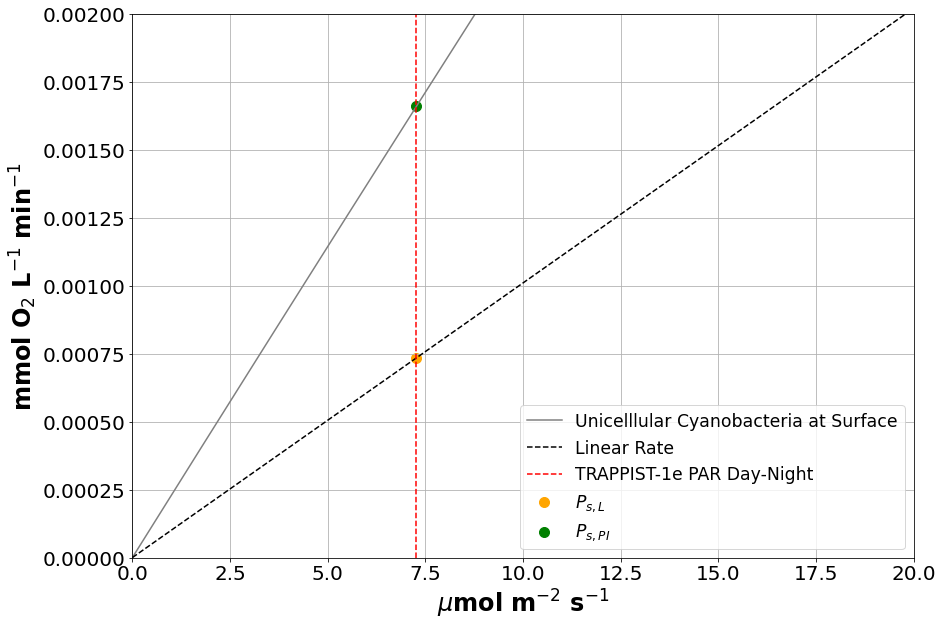

In [14]:
#For Cyanobacteria at surface. Use only the Day-Night line on the graph. Zoom-In
y_S = (I_cyano_uni_surface_y800/800)*I_test1
#y_4mm = (I_cyano_uni_4mm_y800/800)*I_test1
plt.plot(I_test1, PI_cyano_uni_surface_model, color='grey', label='Unicelllular Cyanobacteria at Surface')
#plt.plot(I_test1, PI_cyano_uni_4mm_model, color='blue', label='Cyanobacterial Unicells at 4mm')
plt.plot(I_test1, y_S, color='black', ls='--', label = 'Linear Rate')
#plt.plot(I_test1, y_4mm, color='black', ls='dashdot', label = 'Linear Rate at 4mm')
plt.xlim(0, 20)
plt.ylim(0, 0.002)
#plt.axvline(800, c='green', ls='--', label='Earth Mean Photosynthetic photon flux')
plt.axvline(7.273113282214148, c='red', ls='--', label='TRAPPIST-1e PAR Day-Night')
plt.xlabel(r'$\mu$mol m$^{-2}$ s$^{-1}$', fontsize=24)
plt.ylabel(r'mmol O$_{2}$ L$^{-1}$ min$^{-1}$', fontsize=24)
plt.xticks(color='black', fontsize = 20)
plt.yticks(color='black', fontsize = 20)
#Intersect points
y_S_line = (I_cyano_uni_surface_y800/800)*7.273113282214148
PI_cyano_uni_surface_model_line = PI_curve_Dobbs(23.55, 0.00023, 0.02410, 7.273113282214148)
plt.scatter(7.273113282214148, y_S_line, s=100, c='orange', marker="o", label=r'$P_{s,L}$')
plt.scatter(7.273113282214148, PI_cyano_uni_surface_model_line, s=100, c='green', marker="o", label=r'$P_{s,PI}$')
plt.legend(fontsize='xx-large')
plt.grid()
plt.savefig('PI_Curve_CyanoUni_Surface_Day.png');

In [15]:
print(r'P_s,L ={} and P_s,PI = {}'.format(y_S_line, PI_cyano_uni_surface_model_line))

P_s,L =0.0007348570979199369 and P_s,PI = 0.0016603525792945664


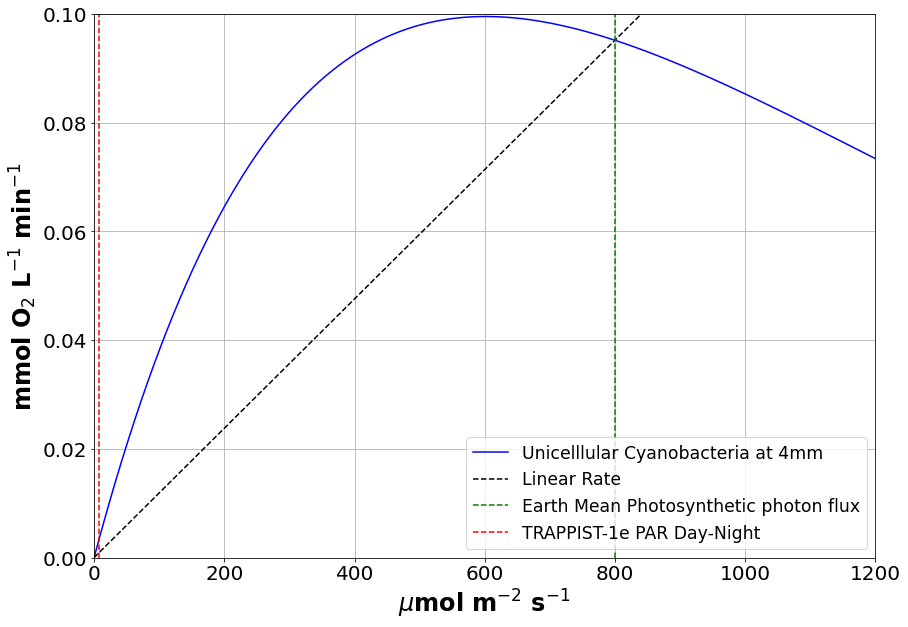

In [16]:
#For Cyanobacteria at 4mm. Use only the Day-Night line on the graph.
#y_S = (I_cyano_uni_surface_y800/800)*I_test1
y_4mm = (I_cyano_uni_4mm_y800/800)*I_test1
#plt.plot(I_test1, PI_cyano_uni_surface_model, color='grey', label='Cyanobacterial Unicells at Surface')
plt.plot(I_test1, PI_cyano_uni_4mm_model, color='blue', label='Unicelllular Cyanobacteria at 4mm')
#plt.plot(I_test1, y_S, color='black', ls='dotted', label = 'Linear Rate')
plt.plot(I_test1, y_4mm, color='black', ls='dashed', label = 'Linear Rate')
plt.xlim(0, 1200)
plt.ylim(0, 0.10)
plt.axvline(800, c='green', ls='--', label='Earth Mean Photosynthetic photon flux')
plt.axvline(7.273113282214148, c='red', ls='--', label='TRAPPIST-1e PAR Day-Night')
plt.xlabel(r'$\mu$mol m$^{-2}$ s$^{-1}$', fontsize=24)
plt.ylabel(r'mmol O$_{2}$ L$^{-1}$ min$^{-1}$', fontsize=24)
plt.xticks(color='black', fontsize = 20)
plt.yticks(color='black', fontsize = 20)
plt.legend(fontsize='xx-large')
plt.grid()
plt.savefig('PI_Curve_CyanoUni_4mm.png');

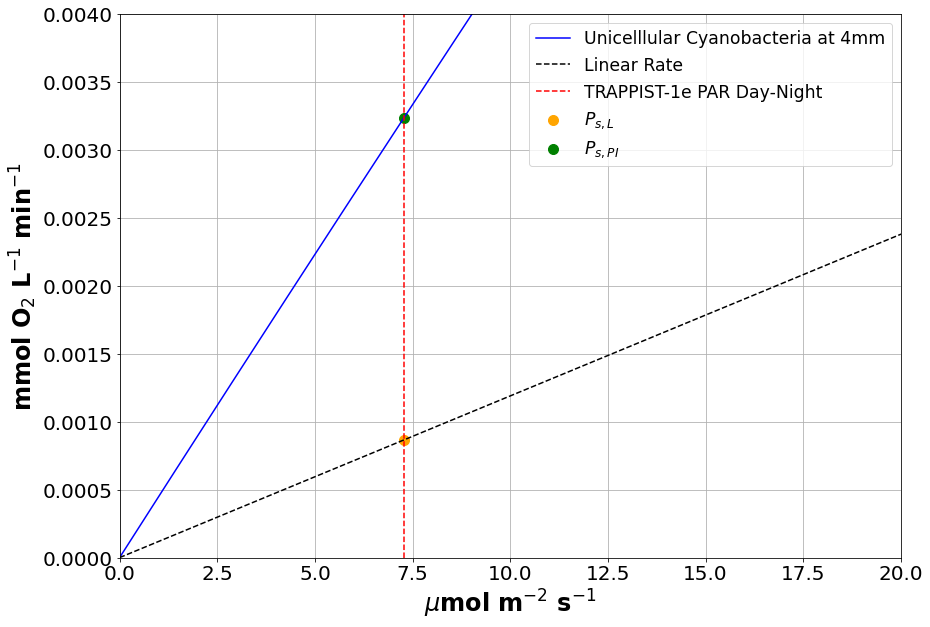

In [17]:
#For Cyanobacteria at 4mm. Use only the Day-Night line on the graph.
#y_S = (I_cyano_uni_surface_y800/800)*I_test1
y_4mm = (I_cyano_uni_4mm_y800/800)*I_test1
#plt.plot(I_test1, PI_cyano_uni_surface_model, color='grey', label='Cyanobacterial Unicells at Surface')
plt.plot(I_test1, PI_cyano_uni_4mm_model, color='blue', label='Unicelllular Cyanobacteria at 4mm')
#plt.plot(I_test1, y_S, color='black', ls='dotted', label = 'Linear Rate')
plt.plot(I_test1, y_4mm, color='black', ls='dashed', label = 'Linear Rate')
plt.xlim(0, 20)
plt.ylim(0, 0.004)
#plt.axvline(800, c='green', ls='--', label='Earth Mean Photosynthetic photon flux')
plt.axvline(7.273113282214148, c='red', ls='--', label='TRAPPIST-1e PAR Day-Night')
plt.xlabel(r'$\mu$mol m$^{-2}$ s$^{-1}$', fontsize=24)
plt.ylabel(r'mmol O$_{2}$ L$^{-1}$ min$^{-1}$', fontsize=24)
plt.xticks(color='black', fontsize = 20)
plt.yticks(color='black', fontsize = 20)
#Intersect points
y_4mm_line = (I_cyano_uni_4mm_y800/800)*7.273113282214148
PI_cyano_uni_4mm_model_line = PI_curve_Dobbs(13.52, 0.00045, 0.02226, 7.273113282214148)
plt.scatter(7.273113282214148, y_4mm_line, s=100, c='orange', marker="o", label=r'$P_{s,L}$')
plt.scatter(7.273113282214148, PI_cyano_uni_4mm_model_line, s=100, c='green', marker="o", label=r'$P_{s,PI}$')
plt.legend(fontsize='xx-large')
plt.grid()
plt.savefig('PI_Curve_CyanoUni_4mm_Day.png');

In [18]:
print(r'P_s,L ={} and P_s,PI = {}'.format(y_4mm_line, PI_cyano_uni_4mm_model_line))

P_s,L =0.0008652237885979773 and P_s,PI = 0.003233550917167935


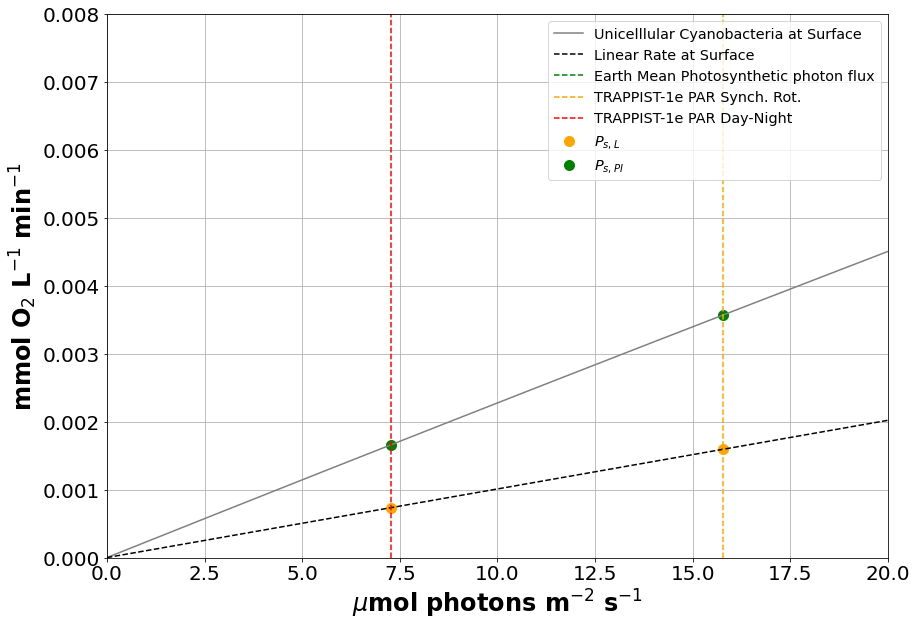

In [19]:
plt.plot(I_test1, PI_cyano_uni_surface_model, color='grey', label='Unicelllular Cyanobacteria at Surface')
#plt.plot(I_test1, PI_cyano_uni_4mm_model, color='blue', label='Cyanobacterial Unicells at 4mm')
plt.plot(I_test1, y_S, color='black', ls='dashed', label = 'Linear Rate at Surface')
#plt.plot(I_test1, y_4mm, color='black', ls='dashdot', label = 'Linear Rate at 4mm')
plt.xlim(0, 20)
plt.ylim(0, 0.008)
plt.axvline(800, c='green', ls='--', label='Earth Mean Photosynthetic photon flux')
plt.axvline(15.775378788664256, c='orange', ls='--', label='TRAPPIST-1e PAR Synch. Rot.')
plt.axvline(7.273113282214148, c='red', ls='--', label='TRAPPIST-1e PAR Day-Night')
plt.xlabel(r'$\mu$mol photons m$^{-2}$ s$^{-1}$', fontsize=24)
plt.ylabel(r'mmol O$_{2}$ L$^{-1}$ min$^{-1}$', fontsize=24)
#Intersection points
y_S_line = (I_cyano_uni_surface_y800/800)*7.273113282214148
PI_cyano_uni_surface_model_line = PI_curve_Dobbs(23.55, 0.00023, 0.02410, 7.273113282214148)
plt.scatter(7.273113282214148, y_S_line, s=100, c='orange', marker="o", label=r'$P_{s,L}$')
plt.scatter(7.273113282214148, PI_cyano_uni_surface_model_line, s=100, c='green', marker="o", label=r'$P_{s,PI}$')
y_S_line_syn = (I_cyano_uni_surface_y800/800)*15.775378788664256
PI_cyano_uni_surface_model_line_syn = PI_curve_Dobbs(23.55, 0.00023, 0.02410, 15.775378788664256)
plt.scatter(15.775378788664256, y_S_line_syn, s=100, c='orange', marker="o")
plt.scatter(15.775378788664256, PI_cyano_uni_surface_model_line_syn, s=100, c='green', marker="o")
plt.xticks(color='black', fontsize = 20)
plt.yticks(color='black', fontsize = 20)
plt.legend(fontsize='x-large')
plt.grid();

In [20]:
print(r'P_s,L ={} and P_s,PI = {}'.format(y_S_line_syn, PI_cyano_uni_surface_model_line_syn))

P_s,L =0.0015939046492750904 and P_s,PI = 0.0035699572123232097


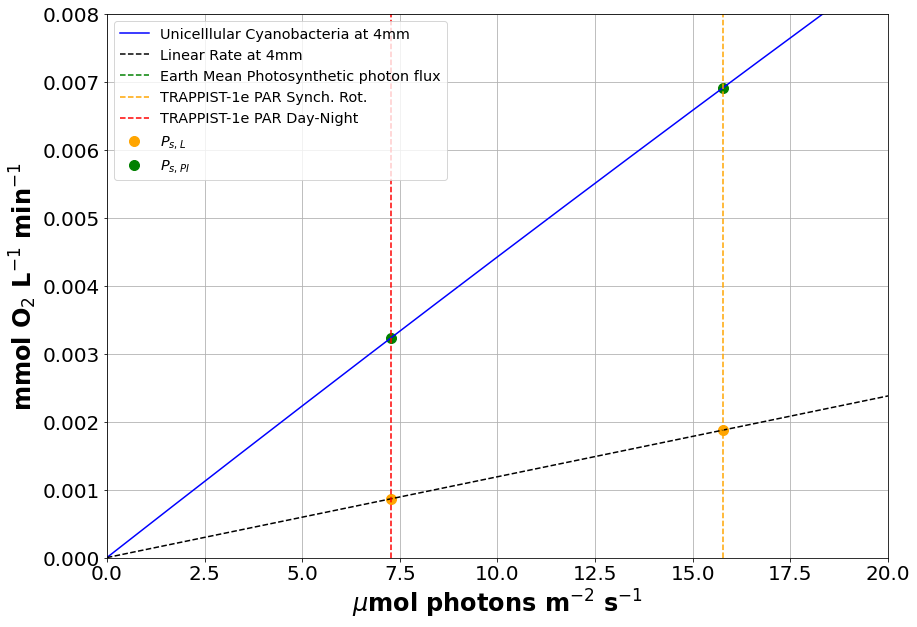

In [21]:
#plt.plot(I_test1, PI_cyano_uni_surface_model, color='grey', label='Cyanobacterial Unicells at Surface')
plt.plot(I_test1, PI_cyano_uni_4mm_model, color='blue', label='Unicelllular Cyanobacteria at 4mm')
#plt.plot(I_test1, y_S, color='black', ls='dotted', label = 'Linear Rate at Surface')
plt.plot(I_test1, y_4mm, color='black', ls='dashed', label = 'Linear Rate at 4mm')
plt.xlim(0, 20)
plt.ylim(0, 0.008)
plt.axvline(800, c='green', ls='--', label='Earth Mean Photosynthetic photon flux')
plt.axvline(15.775378788664256, c='orange', ls='--', label='TRAPPIST-1e PAR Synch. Rot.')
plt.axvline(7.273113282214148, c='red', ls='--', label='TRAPPIST-1e PAR Day-Night')
plt.xlabel(r'$\mu$mol photons m$^{-2}$ s$^{-1}$', fontsize=24)
plt.ylabel(r'mmol O$_{2}$ L$^{-1}$ min$^{-1}$', fontsize=24)
plt.xticks(color='black', fontsize = 18)
plt.yticks(color='black', fontsize = 18)
#Intersect points
y_4mm_line = (I_cyano_uni_4mm_y800/800)*7.273113282214148
PI_cyano_uni_4mm_model_line = PI_curve_Dobbs(13.52, 0.00045, 0.02226, 7.273113282214148)
plt.scatter(7.273113282214148, y_4mm_line, s=100, c='orange', marker="o", label=r'$P_{s,L}$')
plt.scatter(7.273113282214148, PI_cyano_uni_4mm_model_line, s=100, c='green', marker="o", label=r'$P_{s,PI}$')
y_4mm_line_syn = (I_cyano_uni_4mm_y800/800)*15.775378788664256
PI_cyano_uni_4mm_model_line_syn = PI_curve_Dobbs(13.52, 0.00045, 0.02226, 15.775378788664256)
plt.scatter(15.775378788664256, y_4mm_line_syn, s=100, c='orange', marker="o")
plt.scatter(15.775378788664256, PI_cyano_uni_4mm_model_line_syn, s=100, c='green', marker="o")
plt.xticks(color='black', fontsize = 20)
plt.yticks(color='black', fontsize = 20)
plt.legend(fontsize='x-large')
plt.grid();

In [22]:
print(r'P_s,L ={} and P_s,PI = {}'.format(y_4mm_line_syn, PI_cyano_uni_4mm_model_line_syn))

P_s,L =0.0018766699310836295 and P_s,PI = 0.0069150959011465285


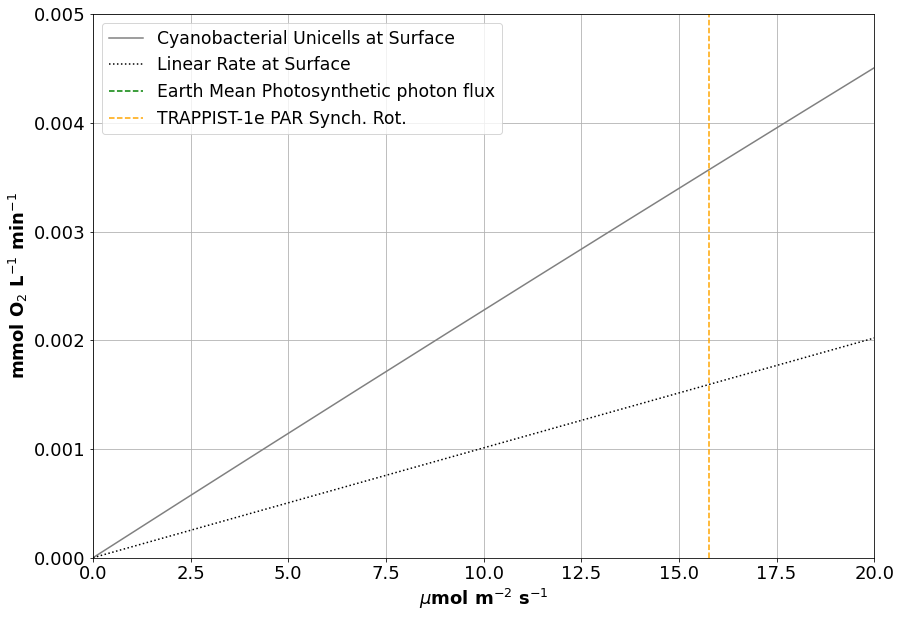

In [23]:
plt.plot(I_test1, PI_cyano_uni_surface_model, color='grey', label='Cyanobacterial Unicells at Surface')
#plt.plot(I_test1, PI_cyano_uni_4mm_model, color='blue', label='Cyanobacterial Unicells at 4mm')
plt.plot(I_test1, y_S, color='black', ls='dotted', label = 'Linear Rate at Surface')
#plt.plot(I_test1, y_4mm, color='black', ls='dashdot', label = 'Linear Rate at 4mm')
plt.xlim(0, 20)
plt.ylim(0, 0.005)
plt.axvline(800, c='green', ls='--', label='Earth Mean Photosynthetic photon flux')
plt.axvline(15.775378788664256, c='orange', ls='--', label='TRAPPIST-1e PAR Synch. Rot.')
#plt.axvline(7.273113282214148, c='red', ls='--', label='TRAPPIST-1e PAR Day-Night')
plt.xlabel(r'$\mu$mol m$^{-2}$ s$^{-1}$')
plt.ylabel(r'mmol O$_{2}$ L$^{-1}$ min$^{-1}$')
plt.xticks(color='black', fontsize = 18)
plt.yticks(color='black', fontsize = 18)
plt.legend(fontsize='xx-large')
plt.grid();

In [24]:
#Factor difference for surface of TRAPPIST-1e Tidal Lock
I_cyano_uni_surface_y15 = PI_curve_Dobbs(23.55, 0.00023, 0.02410, 15.775378788664256)
y_S_15 = (I_cyano_uni_surface_y800/800)*15.775378788664256
print('On surface, the linear line for 15.775 micromol m-2 s-1 is {} while the PI Curve is {}.'.format(y_S_15,I_cyano_uni_surface_y15))
print('Thus it is off by a ratio of {} of the Linear line over the PI Curve.'.format(y_S_15/I_cyano_uni_surface_y15))

On surface, the linear line for 15.775 micromol m-2 s-1 is 0.0015939046492750904 while the PI Curve is 0.0035699572123232097.
Thus it is off by a ratio of 0.44647724173641573 of the Linear line over the PI Curve.


In [25]:
#Factor difference for surface of TRAPPIST-1e Day-Night
I_cyano_uni_surface_y7 = PI_curve_Dobbs(23.55, 0.00023, 0.02410, 7.273113282214148)
y_S_7 = (I_cyano_uni_surface_y800/800)*7.273113282214148
print('On surface, the linear line for 7.273 micromol m-2 s-1 is {} while the PI Curve is {}.'.format(y_S_7,I_cyano_uni_surface_y7))
print('Thus it is off by a ratio of {} of the Linear line over the PI Curve.'.format(y_S_7/I_cyano_uni_surface_y7))

On surface, the linear line for 7.273 micromol m-2 s-1 is 0.0007348570979199369 while the PI Curve is 0.0016603525792945664.
Thus it is off by a ratio of 0.44259099367446125 of the Linear line over the PI Curve.


In [26]:
#Difference between Day-Night minus Tidal Lock at surface
(y_S_7/I_cyano_uni_surface_y7) - (y_S_15/I_cyano_uni_surface_y15)

-0.003886248061954478

In [27]:
#Factor difference for 4mm depth of TRAPPIST-1e Tidal Lock
I_cyano_uni_4mm_y15 = PI_curve_Dobbs(13.52, 0.00045, 0.02226, 15.775378788664256)
y_4mm_15 = (I_cyano_uni_4mm_y800/800)*15.775378788664256
print('At 4mm depth, the linear line for 15.775 micromol m-2 s-1 is {} while the PI Curve is {}.'.format(y_4mm_15,I_cyano_uni_4mm_y15))
print('Thus it is off by a ratio of {} of the Linear line over the PI Curve.'.format(y_4mm_15/I_cyano_uni_4mm_y15))

At 4mm depth, the linear line for 15.775 micromol m-2 s-1 is 0.0018766699310836295 while the PI Curve is 0.0069150959011465285.
Thus it is off by a ratio of 0.27138740487640617 of the Linear line over the PI Curve.


In [28]:
#Factor difference for 4mm depth of TRAPPIST-1e Day-Night
I_cyano_uni_4mm_y7 = PI_curve_Dobbs(13.52, 0.00045, 0.02226, 7.273113282214148)
y_4mm_7 = (I_cyano_uni_4mm_y800/800)*7.273113282214148
print('At 4mm depth, the linear line for 7.273 micromol m-2 s-1 is {} while the PI Curve is {}.'.format(y_4mm_7,I_cyano_uni_4mm_y7))
print('Thus it is off by a ratio of {} of the Linear line over the PI Curve.'.format(y_4mm_7/I_cyano_uni_4mm_y7))

At 4mm depth, the linear line for 7.273 micromol m-2 s-1 is 0.0008652237885979773 while the PI Curve is 0.003233550917167935.
Thus it is off by a ratio of 0.2675769798472117 of the Linear line over the PI Curve.


In [29]:
#Difference between Day-Night minus Tidal Lock at 4mm
(y_4mm_7/I_cyano_uni_4mm_y7) - (y_4mm_15/I_cyano_uni_4mm_y15)

-0.0038104250291944863

In [30]:

#Difference between Day-Night at 4mm minus surface
(y_4mm_7/I_cyano_uni_4mm_y7)-(y_S_7/I_cyano_uni_surface_y7)

-0.17501401382724957

In [31]:
#Difference between Tidal Lock at 4mm minus surface
(y_4mm_15/I_cyano_uni_4mm_y15)-(y_S_15/I_cyano_uni_surface_y15)

-0.17508983686000956

The ratios of $\frac{Linear Line}{PI curve}$ where the TRAPPIST-1 Surface PAR intersect. 
* For surface, the photoinhibition factor is 0.44647724173641573 at 15.775 $\mu$mol m$^{-2}$ s$^{-1}$
* For surface, the photoinhibition factor is 0.44259099367446125 at 7.273 $\mu$mol m$^{-2}$ s$^{-1}$
* For 4 mm depth, the photoinhibition factor is 0.27138740487640617 at 15.775 $\mu$mol m$^{-2}$ s$^{-1}$
* For 4 mm depth, the photoinhibition factor is 0.2675769798472117 at 7.273 $\mu$mol m$^{-2}$ s$^{-1}$

Difference between the two:
* Difference between Day-Night minus Tidal Lock at surface is -0.003886.
* Difference between Day-Night minus Tidal Lock at 4mm is -0.003810.
* Difference between Day-Night at 4mm minus surface is -0.1750140.
* Difference between Tidal Lock at 4mm minus surface -0.1750898.

It seems there's little difference between the day-night setting and tidal lock setting based on the PI Curves from Dobbs et al. 1999 and the linear line assumption. 

However, the ratio at least cut in half when the cyanobacteria has a depth of 4 mm compared to the surface. 

## For extension of PAR 

For the surface at air mass 1.5, Earth’s surface recieves 1.24 x 1021 photons m-2 s-1, or 2066.42 μmol m-2 s-1, in PARext. As about 73% of photons reach the surface in PARext, for TRAPPIST-1e about 2.39 x 1019 photons m-2 s-1, or 40.45 μmol m-2 s-1, are received. Assuming this is the maximum PAR photon flux on the day side only, I can apply the same method to determine the average photon flux a day-night cycle where the Earth-analog TRAPPIST-1e obtains 18.65 μmol m-2 s-1. 

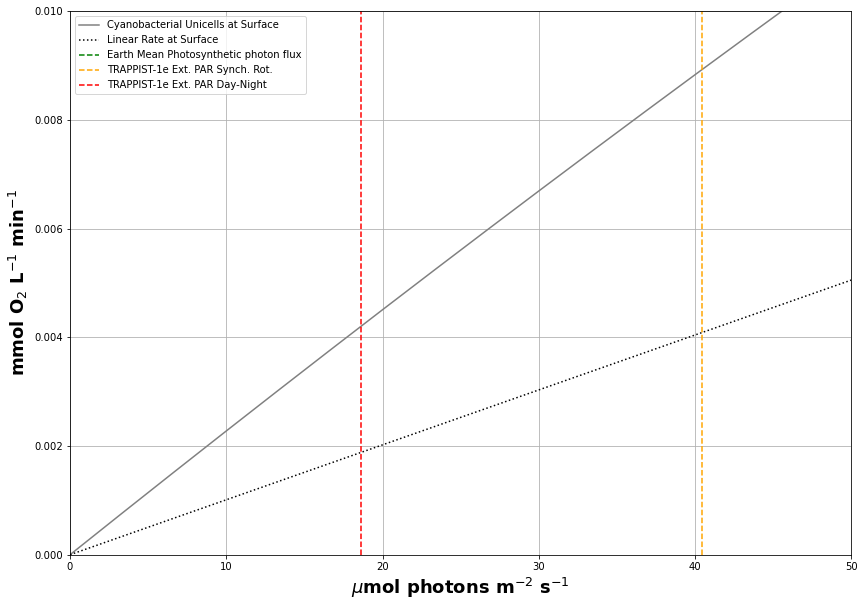

In [32]:
plt.plot(I_test1, PI_cyano_uni_surface_model, color='grey', label='Cyanobacterial Unicells at Surface')
#plt.plot(I_test1, PI_cyano_uni_4mm_model, color='blue', label='Cyanobacterial Unicells at 4mm')
plt.plot(I_test1, y_S, color='black', ls='dotted', label = 'Linear Rate at Surface')
#plt.plot(I_test1, y_4mm, color='black', ls='dashdot', label = 'Linear Rate at 4mm')
plt.xlim(0, 50)
plt.ylim(0, 0.01)
plt.axvline(800, c='green', ls='--', label='Earth Mean Photosynthetic photon flux')
plt.axvline(40.44539076129709, c='orange', ls='--', label='TRAPPIST-1e Ext. PAR Synch. Rot.')
plt.axvline(18.647026654073702, c='red', ls='--', label='TRAPPIST-1e Ext. PAR Day-Night')
plt.xlabel(r'$\mu$mol photons m$^{-2}$ s$^{-1}$')
plt.ylabel(r'mmol O$_{2}$ L$^{-1}$ min$^{-1}$')
plt.legend()
plt.grid();

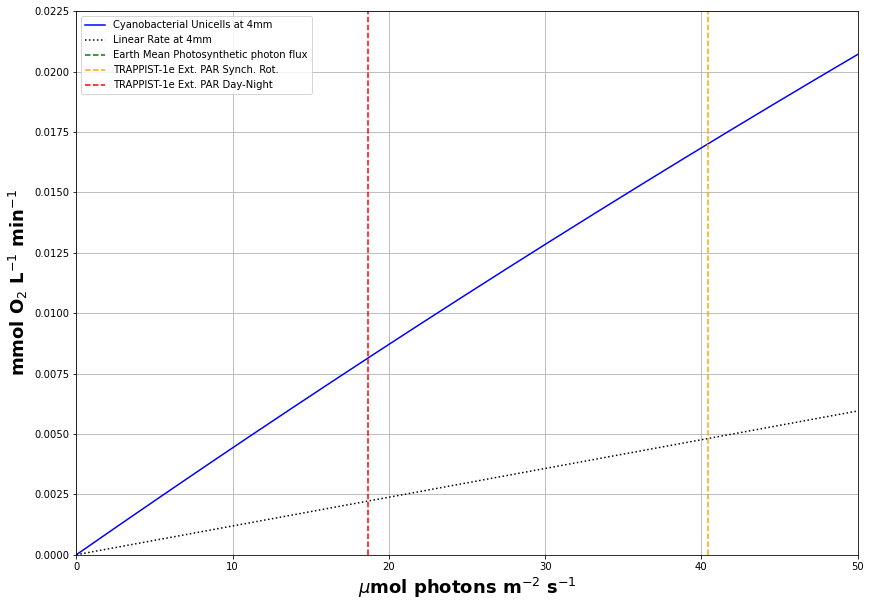

In [33]:
#plt.plot(I_test1, PI_cyano_uni_surface_model, color='grey', label='Cyanobacterial Unicells at Surface')
plt.plot(I_test1, PI_cyano_uni_4mm_model, color='blue', label='Cyanobacterial Unicells at 4mm')
#plt.plot(I_test1, y_S, color='black', ls='dotted', label = 'Linear Rate at Surface')
plt.plot(I_test1, y_4mm, color='black', ls='dotted', label = 'Linear Rate at 4mm')
plt.xlim(0, 50)
plt.ylim(0, 0.0225)
plt.axvline(800, c='green', ls='--', label='Earth Mean Photosynthetic photon flux')
plt.axvline(40.44539076129709, c='orange', ls='--', label='TRAPPIST-1e Ext. PAR Synch. Rot.')
plt.axvline(18.647026654073702, c='red', ls='--', label='TRAPPIST-1e Ext. PAR Day-Night')
plt.xlabel(r'$\mu$mol photons m$^{-2}$ s$^{-1}$')
plt.ylabel(r'mmol O$_{2}$ L$^{-1}$ min$^{-1}$')
plt.legend()
plt.grid();

In [34]:
#Factor difference for surface of TRAPPIST-1e Tidal Lock Extension
I_cyano_uni_surface_y40 = PI_curve_Dobbs(23.55, 0.00023, 0.02410, 40.44539076129709)
y_S_40 = (I_cyano_uni_surface_y800/800)*40.44539076129709
print('On surface, the linear line for 40.445 micromol m-2 s-1 is {} while the PI Curve is {}.'.format(y_S_40,I_cyano_uni_surface_y40))
print('Thus it is off by a ratio of {} of the Linear line over the PI Curve.'.format(y_S_40/I_cyano_uni_surface_y40))

On surface, the linear line for 40.445 micromol m-2 s-1 is 0.004086500694519155 while the PI Curve is 0.008923508912877862.
Thus it is off by a ratio of 0.45794773495679114 of the Linear line over the PI Curve.


In [35]:
#Factor difference for surface of TRAPPIST-1e Day-Night Extension
I_cyano_uni_surface_y18 = PI_curve_Dobbs(23.55, 0.00023, 0.02410, 18.647026654073702)
y_S_18 = (I_cyano_uni_surface_y800/800)*18.647026654073702
print('On surface, the linear line for 18.647 micromol m-2 s-1 is {} while the PI Curve is {}.'.format(y_S_18,I_cyano_uni_surface_y18))
print('Thus it is off by a ratio of {} of the Linear line over the PI Curve.'.format(y_S_18/I_cyano_uni_surface_y18))

On surface, the linear line for 18.647 micromol m-2 s-1 is 0.0018840487367847991 while the PI Curve is 0.004207367513679708.
Thus it is off by a ratio of 0.4477975196269543 of the Linear line over the PI Curve.


In [36]:
#Factor difference for 4mm depth of TRAPPIST-1e Tidal Lock
I_cyano_uni_4mm_y40 = PI_curve_Dobbs(13.52, 0.00045, 0.02226, 40.44539076129709)
y_4mm_40 = (I_cyano_uni_4mm_y800/800)*40.44539076129709
print('At 4mm depth, the linear line for 40.445 micromol m-2 s-1 is {} while the PI Curve is {}.'.format(y_4mm_40,I_cyano_uni_4mm_y40))
print('Thus it is off by a ratio of {} of the Linear line over the PI Curve.'.format(y_4mm_40/I_cyano_uni_4mm_y40))

At 4mm depth, the linear line for 40.445 micromol m-2 s-1 is 0.00481146283138351 while the PI Curve is 0.01701645254721292.
Thus it is off by a ratio of 0.2827535773413341 of the Linear line over the PI Curve.


In [37]:
#Factor difference for 4mm depth of TRAPPIST-1e Day-Night
I_cyano_uni_4mm_y18 = PI_curve_Dobbs(13.52, 0.00045, 0.02226, 18.647026654073702)
y_4mm_18 = (I_cyano_uni_4mm_y800/800)*18.647026654073702
print('At 4mm depth, the linear line for 18.647 micromol m-2 s-1 is {} while the PI Curve is {}.'.format(y_4mm_18,I_cyano_uni_4mm_y18))
print('Thus it is off by a ratio of {} of the Linear line over the PI Curve.'.format(y_4mm_18/I_cyano_uni_4mm_y18))

At 4mm depth, the linear line for 18.647 micromol m-2 s-1 is 0.002218286780597689 while the PI Curve is 0.008134931407995656.
Thus it is off by a ratio of 0.2726865992277919 of the Linear line over the PI Curve.


The ratios of $\frac{Linear Line}{PI curve}$ where the TRAPPIST-1 Surface Extended PAR intersect. 
* For surface, the photoinhibition factor is 0.45794773495679114  at 40.445 $\mu$mol m$^{-2}$ s$^{-1}$
* For surface, the photoinhibition factor is 0.4477975196269543 at 18.647 $\mu$mol m$^{-2}$ s$^{-1}$
* For 4 mm depth, the photoinhibition factor is 0.2827535773413341 at 40.445 $\mu$mol m$^{-2}$ s$^{-1}$
* For 4 mm depth, the photoinhibition factor is 0.2726865992277919 at 18.647 $\mu$mol m$^{-2}$ s$^{-1}$


**Ulothrix**

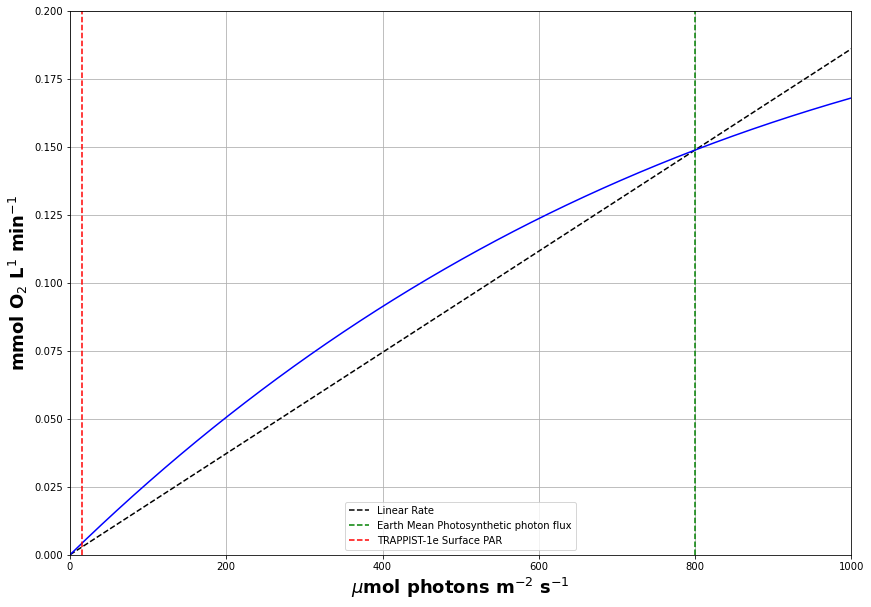

In [39]:
#Ulothrix of areal
PI_Ulothrix_areal_y800 = PI_curve_Dobbs(108.90, 0.00028, 0.05547, 800)
y_Ua = (PI_Ulothrix_areal_y800/800)*I_test1
plt.plot(I_test1, y_Ua, color='black', ls='--', label='Linear Rate')
#plt.scatter(sol_irrad_micromol, PI_Ulothrix_areal_data, color='blue', label='Ulothrix at areal')
plt.plot(I_test1, PI_Ulothrix_areal_model, color='blue')
plt.axvline(800, c='green', ls='--', label='Earth Mean Photosynthetic photon flux')
plt.axvline(15.775378788664256, c='red', ls='--', label='TRAPPIST-1e Surface PAR')
plt.xlim(0, 1000)
plt.ylim(0, 0.2)
plt.xlabel(r'$\mu$mol photons m$^{-2}$ s$^{-1}$')
plt.ylabel(r'mmol O$_{2}$ L$^{1}$ min$^{-1}$')
plt.legend()
plt.grid();

In [40]:
PI_Ulothrix_areal_y15 = PI_curve_Dobbs(108.90, 0.00028, 0.05547, 15.775378788664256)
y_Ua_15 = (PI_Ulothrix_areal_y800/800)*15.775378788664256
print('On the linear line for 15.775 micromol m-2 s-1 is {} while the PI Curve is {}.'.format(y_Ua_15, PI_Ulothrix_areal_y15))
print('Thus it is off by a ratio of {} of the Linear line over the PI Curve.'.format(y_Ua_15/PI_Ulothrix_areal_y15))

On the linear line for 15.775 micromol m-2 s-1 is 0.0029357511269835733 while the PI Curve is 0.004381665994157276.
Thus it is off by a ratio of 0.6700079674941551 of the Linear line over the PI Curve.


In [41]:
#PI Curve/Linear Line
PI_Ulothrix_areal_y15/y_Ua_15

1.4925195647150622

## See if you can find a data set Prochlorococcus or Synechococcus cyanobacteria to use.

Found PI curves for Synechococcus in Ritchie et al. 2008 'Fitting light saturation curves measured using modulated
fluorometry' where they use the Waiting-in-Line Model: $P = P_{max} k_{w} E e^{1-k_{w}E}$ where E is the irradiance. 

For Synechococcus in rETR in Table 3: 
* $P_{max}$ = 1252 ± 88.7 (ETR $\mu$mol mg Chl a-1 h-1) 313 ± 22.2 ($\mu$mol O2 mg Chl a-1 h-1)
* $k_{w}$ = 0.00167 ± 0.000115

In [42]:
def PI_curve_WaitCurve(P_max, k_w, E):
    x = (1-(k_w*E))
    P = P_max*k_w*E*(np.exp(x))
    return P

In [43]:
#differential equation of dP/dE
def PI_curve_WaitCurve_diff(P_max, k_w, E):
    x = (1-(k_w*E))
    y = -1*(k_w*E)
    dP = P_max*k_w*(np.exp(y))*(x)
    return dP

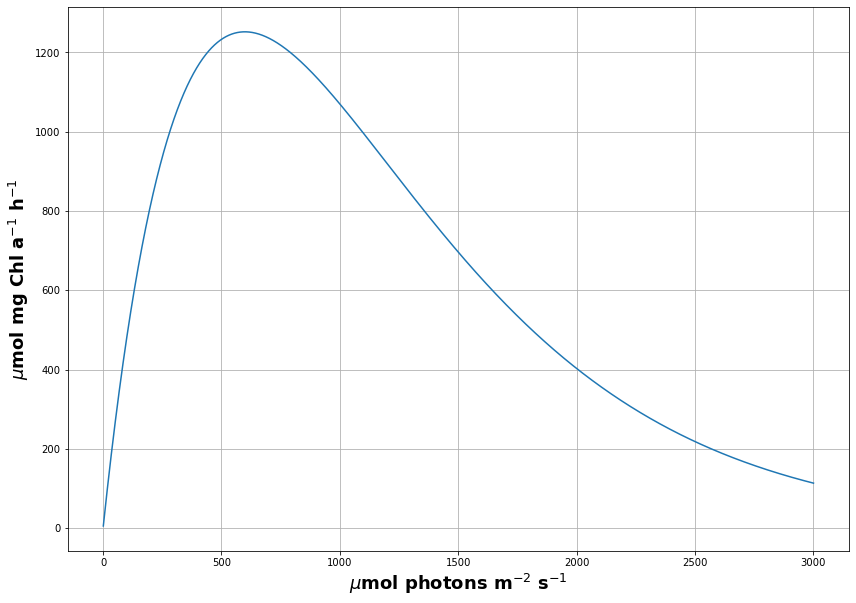

In [44]:
I_test1 = np.arange(1, 3e3, 1e-2)
Synech_Wait_model = PI_curve_WaitCurve(1252, 0.00167, I_test1)
#Synech_Wait_diffmodel = PI_curve_WaitCurve_diff(1252, 0.001877, I_test1)
plt.plot(I_test1, Synech_Wait_model)
plt.xlabel(r'$\mu$mol photons m$^{-2}$ s$^{-1}$')
plt.ylabel(r'$\mu$mol mg Chl a$^{-1}$ h$^{-1}$')
plt.grid();
#plt.plot(I_test1, Synech_Wait_diffmodel)

In [45]:
Synech_Wait_y800 = PI_curve_WaitCurve(1252, 0.00167, 800)
y_S = (Synech_Wait_y800/800)*I_test1
#PI_Ulothrix_areal_data = PI_curve_WaitCurve(1252, 0.00167, sol_irrad_micromol)

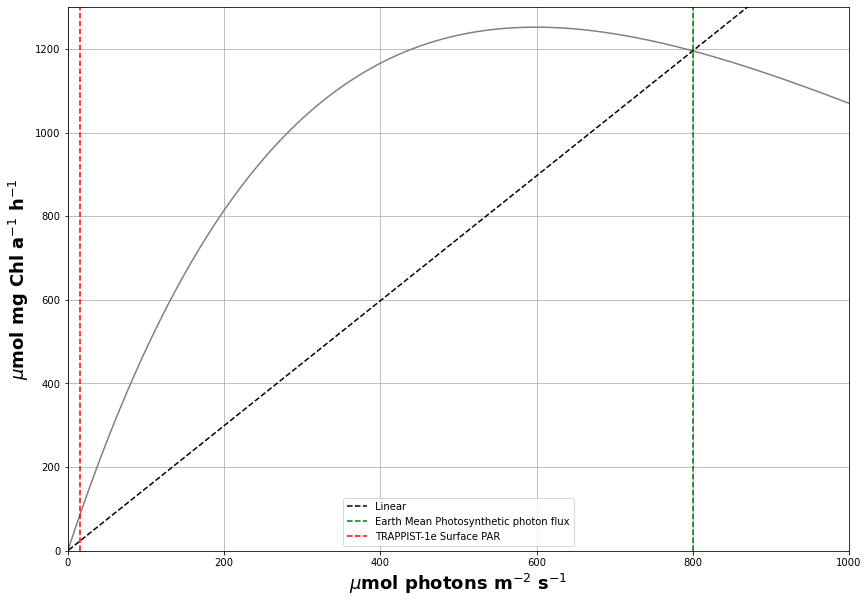

In [46]:
#plt.scatter(sol_irrad_micromol, PI_Ulothrix_areal_data, color='grey', label='Synechococcus')
plt.plot(I_test1, Synech_Wait_model, color='grey')
plt.plot(I_test1, y_S, color='black', ls='--', label='Linear')
plt.xlim(0, 1e3)
plt.ylim(0,1300)
plt.axvline(800, c='green', ls='--', label='Earth Mean Photosynthetic photon flux')
plt.axvline(15.775378788664256, c='red', ls='--', label='TRAPPIST-1e Surface PAR')
plt.xlabel(r'$\mu$mol photons m$^{-2}$ s$^{-1}$')
plt.ylabel(r'$\mu$mol mg Chl a$^{-1}$ h$^{-1}$')
plt.legend()
plt.grid();

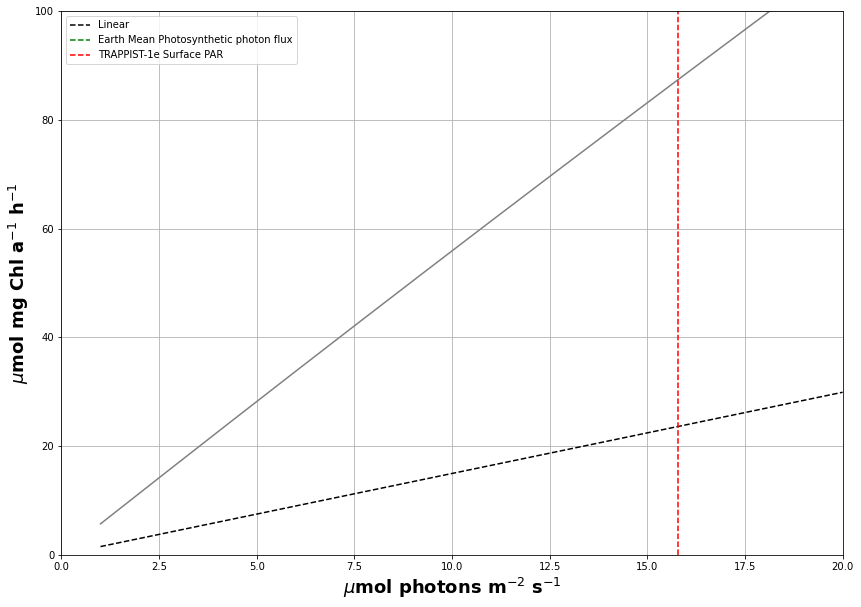

In [47]:
#plt.scatter(sol_irrad_micromol, PI_Ulothrix_areal_data, color='grey', label='Synechococcus')
plt.plot(I_test1, Synech_Wait_model, color='grey')
plt.plot(I_test1, y_S, color='black', ls='--', label='Linear')
plt.xlim(0, 20)
plt.ylim(0, 100)
plt.axvline(800, c='green', ls='--', label='Earth Mean Photosynthetic photon flux')
plt.axvline(15.775378788664256, c='red', ls='--', label='TRAPPIST-1e Surface PAR')
plt.xlabel(r'$\mu$mol photons m$^{-2}$ s$^{-1}$')
plt.ylabel(r'$\mu$mol mg Chl a$^{-1}$ h$^{-1}$')
plt.legend()
plt.grid();

In [48]:
Synech_Wait_y15 = PI_curve_WaitCurve(1252, 0.00167, 15.775378788664256)
y_S_15 = (Synech_Wait_y800/800)*15.775378788664256
print('On the linear line for 15.775 micromol m-2 s-1 is {} while the PI Curve is {}.'.format(y_S_15, Synech_Wait_y15))
print('Thus it is off by a ratio of {} of the Linear over the PI Curve.'.format(y_S_15/Synech_Wait_y15))

On the linear line for 15.775 micromol m-2 s-1 is 23.570980585599926 while the PI Curve is 87.32802550871047.
Thus it is off by a ratio of 0.2699131286696601 of the Linear over the PI Curve.


In [49]:
(Synech_Wait_y15/800)*800

87.32802550871047

In [50]:
#PI curve/Linear line
Synech_Wait_y15/y_S_15

3.7048957378574756